### DATA611 Assignment 2

#### Q1.a

In [2]:
import pandas as pd
from sklearn import datasets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
faces=pd.read_csv("faces.csv")
faces.head()

,person,imagenum,Male,Asian,White,Black,Baby,Child,Youth,Middle Aged,...,Pale Skin,5 o' Clock Shadow,Strong Nose-Mouth Lines,Wearing Lipstick,Flushed Face,High Cheekbones,Brown Eyes,Wearing Earrings,Wearing Necktie,Wearing Necklace
0,Aaron Eckhart,1,1.568346,-1.889043,1.737203,-0.929729,-1.471799,-0.195580,-0.835609,-0.351468,...,0.361738,1.166118,-1.164916,-1.139990,-2.371746,-1.299932,-0.414682,-1.144902,0.694007,-0.826609
1,Aaron Guiel,1,0.169851,-0.982408,0.422709,-1.282184,-1.360060,-0.867002,-0.452293,-0.197521,...,-0.832036,-0.397680,0.874160,-0.945431,-0.268649,-0.006244,-0.030406,-0.480128,0.666760,-0.496559
2,Aaron Patterson,1,0.997749,-1.364195,-0.157377,-0.756447,-1.891825,-0.871526,-0.862893,0.031445,...,1.549743,1.884745,-0.999765,-1.359858,-1.912108,-1.095634,0.915126,-0.572332,0.144262,-0.841231
3,Aaron Peirsol,1,1.122719,-1.997799,1.916144,-2.514214,-2.580071,-1.404239,0.057551,0.000196,...,0.567822,-0.176089,1.108125,-1.600944,-3.264613,0.813418,0.308631,-0.848693,0.475941,-0.447025
4,Aaron Peirsol,2,1.078214,-2.008098,1.676211,-2.278056,-2.651845,-1.348408,0.649089,0.017656,...,-1.461474,-0.955283,0.119113,-1.128176,-3.161048,0.082680,-0.439614,-0.359859,-0.760774,-0.410152


In [4]:
#calculate correlations between all variables except "person"
cors=faces.drop(["person"], axis=1).corr()
target=cors["imagenum"]
print(target)

imagenum            1.000000
Male                0.179689
Asian              -0.034019
White               0.111189
Black              -0.018084
                      ...   
High Cheekbones    -0.090799
Brown Eyes         -0.056671
Wearing Earrings   -0.149949
Wearing Necktie     0.135014
Wearing Necklace   -0.132267
Name: imagenum, Length: 74, dtype: float64


In [5]:
np.array(cors["imagenum"].index[cors["imagenum"]<0.1].tolist())

array(['Asian', 'Black', 'Baby', 'Child', 'Youth', 'Middle Aged',
       'Black Hair', 'Blond Hair', 'Brown Hair', 'Bald', 'No Eyewear',
       'Eyeglasses', 'Sunglasses', 'Mustache', 'Smiling', 'Chubby',
       'Blurry', 'Harsh Lighting', 'Flash', 'Soft Lighting', 'Wavy Hair',
       'Straight Hair', 'Bangs', 'Sideburns', 'Fully Visible Forehead',
       'Partially Visible Forehead', 'Obstructed Forehead',
       'Bushy Eyebrows', 'Arched Eyebrows', 'Eyes Open', 'Big Nose',
       'Pointy Nose', 'Big Lips', 'Mouth Closed', 'Mouth Slightly Open',
       'Mouth Wide Open', 'Teeth Not Visible', 'No Beard', 'Goatee',
       'Round Jaw', 'Wearing Hat', 'Oval Face', 'Round Face',
       'Color Photo', 'Posed Photo', 'Attractive Man', 'Attractive Woman',
       'Indian', 'Bags Under Eyes', 'Heavy Makeup', 'Rosy Cheeks',
       'Shiny Skin', 'Pale Skin', "5 o' Clock Shadow",
       'Strong Nose-Mouth Lines', 'Wearing Lipstick', 'Flushed Face',
       'High Cheekbones', 'Brown Eyes', 'Wearing 

<AxesSubplot:>

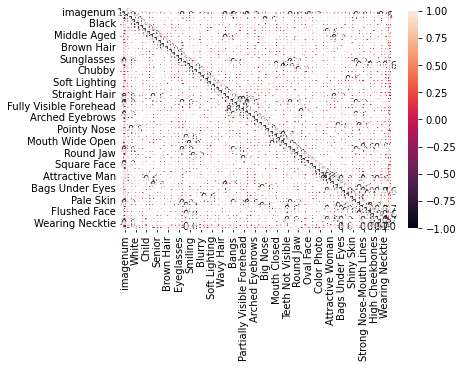

In [6]:
sns.heatmap(faces.corr(), annot = True, fmt=".1f", vmin=-1, vmax=1)

#### 1.b & 1.c

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X=faces.iloc[:, 2:]
Y=faces["imagenum"]

In [25]:
data=faces.iloc[:, faces.columns != 'person']

from sklearn.linear_model import LinearRegression
mlr= LinearRegression()  

mlr.fit(X, Y) 

LinearRegression()

In [26]:
from sklearn.feature_selection import RFE

#Define RFE 
rfe = RFE(mlr, n_features_to_select=5, step=1)

#Use RFE to select the top 5 features 
fit = rfe.fit(X, Y)

#Create a dataframe for the results 
faces_RFE_results = []
for i in range(X.shape[1]):
    faces_RFE_results.append(
        {      
            'Feature_names': faces.columns[i],
            'Selected':  rfe.support_[i],
            'RFE_ranking':  rfe.ranking_[i],
        }
    )

faces_RFE_results = pd.DataFrame(faces_RFE_results)
faces_RFE_results.index.name='Columns'
faces_RFE_results.sort_values(by=["RFE_ranking"])

,Feature_names,Selected,RFE_ranking
Columns,,,
20,Frowning,True,1
51,Wearing Hat,True,1
24,Flash,True,1
6,Baby,True,1
7,Child,True,1
...,...,...,...
61,Bags Under Eyes,False,65
53,Square Face,False,66
32,Sideburns,False,67


In [27]:
print(mlr.coef_)

[ 10.78796094  -5.92028789  -0.67998208  -3.21268243   2.28622081
   0.24819967 -17.65588429 -17.19632983  -5.31976675  -7.6423946
  -9.83068922  -2.21286642  -2.3093834    4.75726121   1.60667085
  -1.60451424 -12.35374489   2.40537463   1.50656561  -4.71457819
 -10.47093535  -4.19289005  -7.33598696  -1.33704092  13.6938436
  -0.12213084   1.0422745   -5.78659133  -3.75373749  -4.86635986
   3.20454196  -0.42953607  -0.14311828   0.09838291  -4.47878446
   1.10265705   4.86081272   5.73235436  -1.83142186 -15.57528847
  -0.75062964   5.7170456    4.57914843   5.38997943  -1.51612813
  -1.82276314 -19.65841122  11.31510958  14.64170382  -5.62447708
   9.61931841  17.42486316  -3.97364306   0.18225664 -10.55600933
  -0.63030752   5.48608094  -2.55954522   8.66941179  -3.93366874
  -6.88075852  -0.18704952  17.59410583   0.29995794   9.26543543
 -10.81905125  -0.59165348  -0.32426357  -1.30858921   2.64595909
   1.82969183   2.52997191   7.43283803]


#### 1.d

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.30, random_state = 100)
X_train.head()

,Male,Asian,White,Black,Baby,Child,Youth,Middle Aged,Senior,Black Hair,...,Pale Skin,5 o' Clock Shadow,Strong Nose-Mouth Lines,Wearing Lipstick,Flushed Face,High Cheekbones,Brown Eyes,Wearing Earrings,Wearing Necktie,Wearing Necklace
5430,1.234044,-1.841917,1.826950,-2.365823,-1.284094,-1.242162,-1.339298,0.064990,-0.215826,-0.346342,...,1.288810,-0.803728,0.558906,-1.029164,-0.774502,0.269284,0.426521,-0.436416,0.539369,-0.147044
12803,1.116242,0.290508,0.021988,-2.309143,-2.246894,-1.081379,-0.497859,-0.612905,0.474760,-1.631303,...,-3.089983,-1.920133,0.907651,-1.081969,0.657238,0.853659,0.257740,-0.872517,0.803906,-0.465063
10862,0.890632,-1.883477,2.016481,-1.504925,-1.242629,-1.460297,-1.137635,-0.274605,-0.037443,-1.604331,...,0.907657,-0.941660,-0.140296,-0.845938,-0.318672,-0.851195,-0.426854,-0.560740,-0.083664,-0.791980
8235,1.371656,-0.950682,1.485082,-2.091216,0.418761,-0.757440,-1.944895,-0.380631,-0.218606,-0.766509,...,0.963143,-0.065837,0.022734,-1.642055,0.519241,-0.716842,1.088679,-0.813786,0.542480,-1.067651
2859,0.985218,-0.607711,-0.502029,-1.475135,-0.690260,0.383485,-0.902720,-0.777426,-0.849933,0.504522,...,-2.155603,0.489974,-1.290074,-0.659160,-1.208172,-1.238195,2.177130,-0.636646,-0.232242,-0.759078


In [29]:
X_test.head()

,Male,Asian,White,Black,Baby,Child,Youth,Middle Aged,Senior,Black Hair,...,Pale Skin,5 o' Clock Shadow,Strong Nose-Mouth Lines,Wearing Lipstick,Flushed Face,High Cheekbones,Brown Eyes,Wearing Earrings,Wearing Necktie,Wearing Necklace
12619,1.475891,-1.793066,0.866286,-1.053627,-1.625739,-0.506807,-0.989477,-0.358935,-0.064305,-0.485854,...,-0.708974,1.052355,-0.016288,-1.130527,1.234387,-0.501629,0.428571,-0.388776,0.362743,-0.073210
12229,1.106337,-2.066953,1.246563,-2.750540,-1.612716,-1.314515,-0.625858,-0.275573,-0.013899,-1.140519,...,2.455845,0.668583,-0.243805,-0.818714,-1.051404,-0.929924,-1.260928,-0.982193,0.462096,-1.014253
4949,0.957889,-1.167115,-0.070557,-1.886505,-1.670822,-1.406542,-1.129765,0.019692,-0.437373,-1.288941,...,0.398544,2.473546,1.312311,-1.341819,-2.840261,-0.044346,0.940565,-0.902490,0.635612,-0.804119
6711,0.909240,-2.087850,1.908727,-2.354123,-1.272256,-1.208362,-0.861529,0.055745,-0.119042,-2.031930,...,1.324940,-0.588326,-0.681279,-0.826047,-3.429988,-0.434762,0.464920,-0.757702,0.610605,-1.173288
9499,0.766607,-1.273781,0.235071,-0.459172,-1.067815,-1.110281,-0.853681,-0.324020,-0.350440,-1.155905,...,-1.381212,0.430708,0.157971,-1.087715,1.726761,0.194279,0.214493,-0.471408,0.898763,-0.812037


#### 1.f

In [30]:
from sklearn.decomposition import PCA

pca1=PCA(n_components=73)
X_train = pca1.fit_transform(X_train)

[[-5.95494513e-03  3.19717985e-02 -1.66178533e+00 -1.13888563e+00
  -7.30773941e-01  1.67992391e+00 -3.07219642e-01 -1.12098779e+00
   1.39351917e+00  2.37258862e-01  1.51631117e-01  1.44479609e+00
  -1.67628775e+00  5.17950231e-01  9.54111974e-01  1.74861661e-02
   5.03779953e-01 -6.80187310e-01  6.67774548e-01  2.99346875e-01
   6.41946419e-01  2.37021951e-01  3.04520525e-01  1.14915989e+00
  -8.52021685e-01 -5.94805756e-01 -3.78801688e-01 -7.88655514e-01
  -3.26095099e-01 -8.81505004e-01  1.10187435e-01 -8.80575350e-01
   8.39462748e-01 -1.77201983e-01  3.28252093e-01  8.38700996e-02
   2.00448120e-01  5.06841758e-01  2.91141435e-01 -3.22970173e-01
  -1.10513023e-03  2.18576546e-01  7.84715513e-01 -3.61784901e-01
   4.24325765e-01 -2.91231074e-01 -2.61080040e-01  1.91821241e-01
   4.09531220e-01  3.78484780e-01  4.09545155e-01 -1.19427588e-02
   1.93403776e-01  4.80024837e-01 -1.50798975e-01 -1.69893723e-01
   6.65095040e-02 -4.86555167e-01 -3.41743437e-01  1.62970210e-01
   2.79709

<AxesSubplot:>

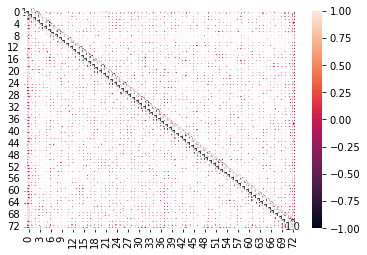

In [31]:
print(X_train[0:4, :])
sns.heatmap(pd.DataFrame(X_train).corr(), annot = True, fmt=".1f", vmin=-1, vmax=1)

#### 1.g

In [32]:
explained_variance1 = pca1.explained_variance_ratio_
explained_variance1

array([1.59823140e-01, 1.31261964e-01, 9.49914573e-02, 9.02321338e-02,
       5.23751600e-02, 4.09493229e-02, 3.79390125e-02, 3.33860391e-02,
       2.92694806e-02, 2.58523733e-02, 2.44342504e-02, 2.30875018e-02,
       1.88019414e-02, 1.70807814e-02, 1.52725869e-02, 1.36954464e-02,
       1.16345296e-02, 1.13494222e-02, 1.02762070e-02, 9.76411200e-03,
       8.85472318e-03, 8.36556061e-03, 7.29265986e-03, 7.07008036e-03,
       6.64416595e-03, 6.14676034e-03, 5.71792374e-03, 5.23453333e-03,
       5.08147100e-03, 4.91463903e-03, 4.37601977e-03, 4.32727114e-03,
       4.26716321e-03, 4.12892992e-03, 4.09922809e-03, 3.68858773e-03,
       3.43428738e-03, 3.29142842e-03, 3.23342264e-03, 2.83415381e-03,
       2.67147871e-03, 2.48305385e-03, 2.43355676e-03, 2.34997027e-03,
       2.24298235e-03, 2.16358728e-03, 2.09984875e-03, 2.00388647e-03,
       1.89604705e-03, 1.81042481e-03, 1.72900139e-03, 1.65151393e-03,
       1.49252160e-03, 1.46033357e-03, 1.40287405e-03, 1.33012051e-03,
      

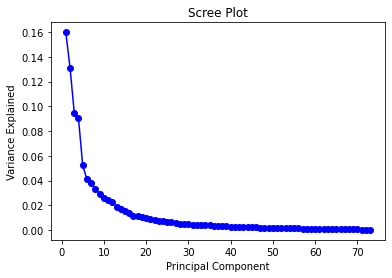

In [33]:
pc_q = np.arange(pca1.n_components_) +1

plt.plot(pc_q, explained_variance1, "o-", color = "blue")
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [34]:
import plotly.express as px

exp_var_cumul = np.cumsum(pca1.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

#### 1.h

In [35]:
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_
explained_variance 

array([0.15982314, 0.13126196])

#### 1.i

In [36]:
print(explained_variance)
eigen_value = np.cumsum(pca.explained_variance_ratio_)
eigen_value

[0.15982314 0.13126196]


array([0.15982314, 0.2910851 ])

#### 1.j

In [42]:
finalDF=pd.DataFrame(X_train[:, 0:2])
finalDF.columns=["pc1", "pc2"]
imagenum=Y_train
finalDF["image_num"]=Y_train
finalDF.head()

,pc1,pc2,image_num
0,-0.005955,0.031972,NaN
1,-0.589224,-7.010661,1.0
2,-1.610657,-1.218151,1.0
3,-2.702108,-0.053263,NaN
4,-1.633483,1.944409,2.0


In [44]:
loadings = pca.components_.T[:,[0,1]] * np.sqrt(pca.explained_variance_[[0,1]])
components=faces.columns.tolist()
components=components[2:75]
loadingdf=pd.DataFrame(loadings,columns=('PC1','PC2'))
loadingdf["variable"]=components
loadingdf

,PC1,PC2,variable
0,2.886257e+00,-1.559442e-13,Male
1,1.788049e-13,2.615680e+00,Asian
2,-2.362516e-12,3.184514e-12,White
3,-5.882277e-12,7.709072e-12,Black
4,1.262138e-10,-1.209895e-10,Baby
...,...,...,...
68,-1.015580e-18,-9.126762e-18,High Cheekbones
69,3.848341e-18,3.402532e-19,Brown Eyes
70,1.651143e-18,1.703312e-18,Wearing Earrings
71,-3.218164e-18,4.964534e-18,Wearing Necktie


#### 1.i

In [46]:
features = ["Beginner", "Certified", "Expert"]
fig = px.scatter(X_train, x=0, y=1, color=finalDF['image_num'])

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

#### Q2.a

In [48]:
churn=pd.read_csv("churn.csv")
churn.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [49]:
x=churn.iloc[:, churn.columns != 'churn']
y=churn.iloc[:, -1]

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x["state"] = le.fit_transform(x["state"])
x["area_code"] = le.fit_transform(x["area_code"])
x["international_plan"] = le.fit_transform(x["international_plan"])
x["voice_mail_plan"] = le.fit_transform(x["voice_mail_plan"])

y=le.fit_transform(y)

C:\Users\tabby\AppData\Local\Temp\ipykernel_15980\3680132431.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tabby\AppData\Local\Temp\ipykernel_15980\3680132431.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tabby\AppData\Local\Temp\ipykernel_15980\3680132431.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [51]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.30, random_state = 100)

In [52]:
x_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
1920,50,94,0,0,0,0,207.0,109,35.19,167.4,80,14.23,238.2,117,10.72,2.6,6,0.70,1
904,27,64,0,0,1,19,291.1,150,49.49,226.7,123,19.27,219.1,67,9.86,7.5,2,2.03,1
875,16,124,1,0,0,0,158.6,104,26.96,211.2,77,17.95,179.3,104,8.07,10.2,8,2.75,3
26,3,12,0,0,0,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1
203,15,51,2,0,0,0,214.8,94,36.52,149.7,58,12.72,283.4,66,12.75,10.2,5,2.75,0


In [53]:
x_test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
249,9,127,1,0,0,0,266.6,106,45.32,264.8,168,22.51,207.2,119,9.32,5.9,2,1.59,1
2419,23,95,1,0,0,0,149.2,96,25.36,260.7,116,22.16,201.0,120,9.05,8.1,2,2.19,1
1568,32,107,1,0,0,0,222.3,101,37.79,286.0,111,24.31,249.4,117,11.22,12.1,4,3.27,1
1483,50,93,0,0,1,42,166.9,101,28.37,273.2,84,23.22,171.0,106,7.69,11.5,1,3.11,1
705,37,67,1,1,0,0,120.9,58,20.55,235.0,88,19.98,95.1,130,4.28,11.4,11,3.08,2


#### 2.b

In [54]:
#Run Naive Bayes using Gaussian classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

#### 2.c

In [55]:
#predic using testing data
y_pred = gnb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
#print the accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8658823529411764


#### 2.d

In [57]:
#create the confusion matrix for prediction
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)
cm

array([[1016,   86],
       [  85,   88]], dtype=int64)

#### 2.e

In [58]:
#evaluate the performance of model
nrows=churn.shape[0]
PCC=(cm[1][1]+cm[0][0])/nrows
errorRate=1-PCC
falseAlarmRate=cm[0][1]/(cm[0][0]+cm[0][1])
falseDismissalRate=cm[1][0]/(cm[1][0]+cm[1][1])
precision=cm[1][1]/(cm[0][1]+cm[1][1])
specificity=cm[0][0]/(cm[0][0]+cm[0][1])
sensitivity=cm[1][1]/(cm[1][1]+cm[1][0])

print("Confusion matrix measures:")
print('PCC:', PCC)
print("Error rate: ", errorRate)
print('False Alarm Rate:', falseAlarmRate)
print('False Dimissal Rate:', falseDismissalRate)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Confusion matrix measure for cut-off value 0.25:
PCC: 0.25976470588235295
Error rate:  0.7402352941176471
False Alarm Rate: 0.0780399274047187
False Dimissal Rate: 0.4913294797687861
Sensitivity: 0.5086705202312138
Specificity: 0.9219600725952813
